### Data Reading  And Pre-processing

In [1]:
# Import Necessary Libraries
import json
import pandas as pd
from textblob import TextBlob
from matplotlib import pyplot as plt

In [2]:
# Function to read in the json
def read_json(json_file: str)->list:
    """
    json file reader to open and read json files into a list
    Args:
    -----
    json_file: str - path of a json file
    
    Returns
    -------
    length of the json file and a list of json
    """
    
    tweets_data = []
    for tweets in open(json_file,'r'):
        tweets_data.append(json.loads(tweets))
    
    
    return len(tweets_data), tweets_data

In [3]:
# a custom function that works like zip()
def my_zip(value):
    """
    This function returns a list of lists, its an iterator of lists where the first item in each passed iterator is paired together, and
    then the second item in each passed iterator are paired together etc.
    
    This is basically a zip() function but a list instead of an object, which contains lists insted of tuples
    """
    has = {}
    for i in value:
        count = 0
        for j in i:
            if count not in has:
                has[count] = []
                has[count].append(j)
            else:
                has[count].append(j)
            count +=1
    return has.values()

In [4]:
# Function that parses the json to dataframe
class TweetDfExtractor:
    """
    this function will parse tweets json into a pandas dataframe
    
    Return
    ------
    dataframe
    """
    def __init__(self, tweets_list):
        
        self.tweets_list = tweets_list

    # an example function
    def find_statuses_count(self)->list:
        
        statuses_count = [self.tweets_list[i]['user']['statuses_count'] for i in range(len(self.tweets_list))]
        
        return statuses_count
    
    def find_full_text(self)->list:
        
        text = [self.tweets_list[i]['text'] for i in range(len(self.tweets_list))]
        
        
        
        return text
    
    
    def find_sentiments(self, text)->list:
        
        polarity = [TextBlob(i).sentiment.polarity for i in text]
        
        subjectivity = [TextBlob(i).sentiment.subjectivity for i in text]
        
        return polarity, subjectivity

    def find_created_time(self)->list:
        
        created_at = [self.tweets_list[i]['user']['created_at'] for i in range(len(self.tweets_list))]
        
        return created_at

    def find_source(self)->list:
        
        source = [self.tweets_list[i]['source'] for i in range(len(self.tweets_list))]

        return source

    def find_screen_name(self)->list:
        
        screen_name = [self.tweets_list[i]['user']['screen_name'] for i in range(len(self.tweets_list))]
        
        return screen_name

    def find_followers_count(self)->list:
        
        followers_count = [self.tweets_list[i]['user']['followers_count'] for i in range(len(self.tweets_list))]
        
        return followers_count

    def find_friends_count(self)->list:
        
        friends_count = [self.tweets_list[i]['user']['friends_count'] for i in range(len(self.tweets_list))]
        
        return friends_count

    def is_sensitive(self)->list:
        lst = []
        try:
            is_sensitive = [self.tweets_list[i]['possibly_sensitive'] for i in range(len(self.tweets_list))]
            for i in is_sensitive:
                if i is None:
                    lst.append(float("NaN"))
                else:
                    lst.append(i)
        except KeyError:
            is_sensitive = None
            
        

        return lst

    def find_favourite_count(self)->list:
        
        fav_count = [self.tweets_list[i]['user']['favourites_count'] for i in range(len(self.tweets_list))]
        
        return fav_count
        
    def find_retweet_count(self)->list:
        
        retweet_count = [self.tweets_list[i]['retweet_count'] for i in range(len(self.tweets_list))]
        
        return retweet_count

    def find_hashtags(self)->list:
        
        hashtags = [self.tweets_list[i]['entities']['hashtags'] for i in range(len(self.tweets_list))]
        
        return hashtags

    def find_mentions(self)->list:
        
        mentions = [self.tweets_list[i]['entities']['user_mentions'] for i in range(len(self.tweets_list))]
        
        return mentions
    
    def find_place_coord_bound(self)->list:
        
        place_coord = [self.tweets_list[i]['user']['location'] for i in range(len(self.tweets_list))]
        
        return place_coord

    def find_location(self)->list:
        lst = []
        try:
            location = [self.tweets_list[i]['place'] for i in range(len(self.tweets_list))]
            for i in location:
                if i is None:
                    lst.append(float("NaN"))
                else:
                    lst.append(i)
            
        except TypeError:
            location = None
        
        return location
    
    def find_lang(self):
        
        lang = [self.tweets_list[i]['lang'] for i in range(len(self.tweets_list))]
        
        return lang

    
        
        
    def get_tweet_df(self, save=False)->pd.DataFrame:
        """required column to be generated you should be creative and add more features"""
        
        columns = ['created_at', 'source', 'original_text','polarity','subjectivity', 'lang', 'favorite_count', 'retweet_count', 
            'original_author', 'followers_count','friends_count','possibly_sensitive', 'hashtags', 'user_mentions', 'place']
        
        created_at = self.find_created_time()
        source = self.find_source()
        text = self.find_full_text()
        polarity, subjectivity = self.find_sentiments(text)
        lang = self.find_lang()
        fav_count = self.find_favourite_count()
        retweet_count = self.find_retweet_count()
        screen_name = self.find_screen_name()
        follower_count = self.find_followers_count()
        friends_count = self.find_friends_count()
        sensitivity = self.is_sensitive()
        hashtags = self.find_hashtags()
        mentions = self.find_mentions()
        location = self.find_location()
        place_coord = self.find_place_coord_bound()
        
        data = my_zip([created_at, source, text, polarity, subjectivity, lang, fav_count, retweet_count, screen_name, follower_count, friends_count,\
                       sensitivity, hashtags, mentions, location, place_coord])
        df = pd.DataFrame(data=data, columns=columns)

        if save:
            df.to_csv('processed_tweet_data.csv', index=False)
            print('File Successfully Saved.!!!')
        
        return df

In [5]:
# reading in the json file
_, tweet_list = read_json("../data/covid19.json")

In [6]:
# creating an object to use TwetDfExtractor class functions
tweet = TweetDfExtractor(tweet_list)

In [7]:
# calling function to get the parsed dataframe
tweet_df = tweet.get_tweet_df()

In [8]:
tweet_df

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Tue Jul 10 00:41:11 +0000 2012,"<a href=""http://twitter.com/download/iphone"" r...","RT @TelGlobalHealth: 🚨Africa is ""in the midst ...",0.000000,0.000000,en,8861,0,ketuesriche,551,351,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",None,Mass
1,Wed Mar 09 14:24:28 +0000 2011,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @globalhlthtwit: Dr Moeti is head of WHO in...,0.133333,0.455556,en,48835,0,Grid1949,66,92,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...",None,"Edinburgh, Scotland"
2,Mon Sep 16 20:31:45 +0000 2013,"<a href=""http://twitter.com/download/iphone"" r...",RT @NHSRDForum: Thank you @research2note for c...,0.316667,0.483333,en,9549,0,LeeTomlinson8,1195,1176,"[{'text': 'red4research', 'indices': [103, 116]}]","[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",None,None
3,Mon Oct 17 23:49:40 +0000 2016,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @HighWireTalk: Former Pfizer VP and Virolog...,0.166667,0.166667,en,42559,0,RIPNY08,2666,2704,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",None,None
4,Sat Apr 04 16:39:49 +0000 2009,"<a href=""http://twitter.com/download/android"" ...",RT @PeterHotez: I think it’s important that we...,0.300000,0.766667,en,10564,0,pash22,28250,30819,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",None,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6527,Sat Jun 06 12:41:48 +0000 2015,"<a href=""http://twitter.com/download/android"" ...",RT @Givenkazeni: Zweli please just release the...,0.000000,0.400000,en,63216,0,Mthatos_Vivi,447,1089,[],"[{'screen_name': 'Givenkazeni', 'name': 'le’Gi...",None,None
6528,Sat Mar 19 11:36:34 +0000 2011,"<a href=""http://twitter.com/download/android"" ...",RT @HighWireTalk: Former Pfizer VP and Virolog...,0.166667,0.166667,en,117154,0,wayno_af007,2224,2739,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",None,"The boro, MA"
6529,Wed Feb 03 06:49:27 +0000 2010,"<a href=""http://twitter.com/download/iphone"" r...","@Jenfeds73 @DcrInYYC Respectfully, veterinaria...",0.281250,0.506250,en,20722,0,dublonothing,3000,4709,[],"[{'screen_name': 'Jenfeds73', 'name': 'Bubs 🇨🇦...",None,"Los Angeles, CA"
6530,Thu Aug 30 04:02:29 +0000 2018,"<a href=""http://twitter.com/download/iphone"" r...","RT @WHOAFRO: ""Africa needs millions more doses...",0.166667,0.166667,en,112237,0,DrAmirKhanGP,135163,1284,"[{'text': 'COVID19', 'indices': [120, 128]}]","[{'screen_name': 'WHOAFRO', 'name': 'WHO Afric...",None,Yorkshire and The Humber


In [9]:
# Function to clean the parsed dataframe
class Clean_Tweets:
    """
    The PEP8 Standard AMAZING!!!
    """
    def __init__(self, df:pd.DataFrame):
        self.df = df
        print('Automation in Action...!!!')
        
    def drop_unwanted_column(self, df:pd.DataFrame)->pd.DataFrame:
        """
        remove rows that has column names. This error originated from
        the data collection stage.  
        """
        unwanted_rows = df[df['retweet_count'] == 'retweet_count' ].index
        df.drop(unwanted_rows , inplace=True)
        df = df[df['polarity'] != 'polarity']
        
        return df
    def drop_duplicate(self, df:pd.DataFrame)->pd.DataFrame:
        """
        drop duplicate rows
        """
        
        duplicated = df[df.astype(str).duplicated()].index
        df.drop(duplicated, inplace=True)
        
        return df
    def convert_to_datetime(self, df:pd.DataFrame)->pd.DataFrame:
        """
        convert column to datetime
        """
        
        df['created_at'] = pd.to_datetime(df['created_at'], infer_datetime_format=True)
        
        df = df[df['created_at'] >= '2020-12-31' ]
        
        return df
    
    def convert_to_numbers(self, df:pd.DataFrame)->pd.DataFrame:
        """
        convert columns like polarity, subjectivity, retweet_count
        favorite_count etc to numbers
        """
        df['polarity'] = pd.to_numeric(df['polarity'], downcast='float')
        
        df['subjectivity'] = pd.to_numeric(df['subjectivity'], downcast='float')

        df['favorite_count'] = pd.to_numeric(df['favorite_count'], downcast='float')
        
        df['retweet_count'] = pd.to_numeric(df['retweet_count'], downcast='float')
        
        df['followers_count'] = pd.to_numeric(df['followers_count'], downcast='float')

        df['friends_count'] = pd.to_numeric(df['friends_count'], downcast='float')
        
        return df
    
    def remove_non_english_tweets(self, df:pd.DataFrame)->pd.DataFrame:
        """
        remove non english tweets from lang
        """
        
        df = df[df['lang'] == 'en']
        
        return df
    
    def get_cleaned_tweet_data(self)->pd.DataFrame:
        """
        uses all functions above and returns cleaned dataframe
        """
        
        first_func = self.drop_unwanted_column(self.df)
        second_func = self.drop_duplicate(first_func)
        third_func =self.convert_to_datetime(second_func)
        fourth_func =self.convert_to_numbers(third_func)
        fifth_func =self.remove_non_english_tweets(fourth_func)
        
        print('\n...Automation complete!')
        
        return fifth_func

In [10]:
# assigning the cleaned dataframe to a variable
cleaned_tweet_df = Clean_Tweets(tweet_df).get_cleaned_tweet_data()

Automation in Action...!!!

...Automation complete!


<ipython-input-9-5a3f13d9384e>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'] = pd.to_numeric(df['polarity'], downcast='float')
<ipython-input-9-5a3f13d9384e>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subjectivity'] = pd.to_numeric(df['subjectivity'], downcast='float')
<ipython-input-9-5a3f13d9384e>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [11]:
cleaned_tweet_df

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
17,2021-03-17 15:16:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @MoetiTshidi: Africa is in the midst of a f...,0.175000,0.275000,en,323.0,0.0,DuncanSteele8,48.0,74.0,[],"[{'screen_name': 'MoetiTshidi', 'name': 'Dr Ma...",None,None
41,2021-03-02 10:05:30+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @doritmi: At least one take away seems to m...,-0.300000,0.400000,en,284.0,0.0,JonathanKuo11,19.0,103.0,[],"[{'screen_name': 'doritmi', 'name': '(((Dorit ...",None,None
47,2021-04-11 19:24:48+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @itranslate123: @AIPAC Will aipac tell the ...,0.000000,0.000000,en,7046.0,0.0,LallaMina13,142.0,367.0,[],"[{'screen_name': 'itranslate123', 'name': 'Ref...",None,"Earth, Milky way"
73,2021-05-31 14:03:19+00:00,"<a href=""https://help.twitter.com/en/using-twi...",Pin Code:[411038] \nBSM-Deenanath Hosp Pvt PMC...,-0.750000,1.000000,en,0.0,0.0,PuneUpdater,88.0,0.0,[],[],None,None
74,2021-05-31 14:03:19+00:00,"<a href=""https://help.twitter.com/en/using-twi...",Pin Code:[411004] \nBMCC-DEENANATH HOSPITAL PV...,-0.750000,1.000000,en,0.0,0.0,PuneUpdater,88.0,0.0,[],[],None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,2021-06-10 09:01:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I urge all the people of #India to take #Covid...,-0.166667,0.833333,en,3.0,0.0,ishitarehagupta,4.0,16.0,"[{'text': 'India', 'indices': [25, 31]}, {'tex...",[],None,"Mumbai, India"
6516,2021-05-31 05:41:06+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @N_RamchanderRao: Covid19 vaccines reach th...,0.000000,0.000000,en,909.0,0.0,RajuRoy70,423.0,542.0,[],"[{'screen_name': 'N_RamchanderRao', 'name': 'N...",None,"Lohia Nagar, Patna"
6522,2021-05-07 09:04:04+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @edendomain: The Truth Behind COVID-19 Vacc...,-0.386111,0.622222,en,14884.0,0.0,Hhuatakedownccp,697.0,303.0,"[{'text': 'DrLiMengYan', 'indices': [117, 129]...","[{'screen_name': 'edendomain', 'name': '新西兰奥克兰...",None,"Osaka-shi Chuo, Osaka"
6524,2021-06-04 10:39:18+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @N_RamchanderRao: Covid19 vaccines reach th...,0.000000,0.000000,en,747.0,0.0,bitu_50,410.0,483.0,[],"[{'screen_name': 'N_RamchanderRao', 'name': 'N...",None,"Jehanabad, India"


In [12]:
# resetting the index
cleaned_tweet_df.reset_index(drop=True, inplace = True)

In [13]:
cleaned_tweet_df

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,2021-03-17 15:16:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @MoetiTshidi: Africa is in the midst of a f...,0.175000,0.275000,en,323.0,0.0,DuncanSteele8,48.0,74.0,[],"[{'screen_name': 'MoetiTshidi', 'name': 'Dr Ma...",None,None
1,2021-03-02 10:05:30+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @doritmi: At least one take away seems to m...,-0.300000,0.400000,en,284.0,0.0,JonathanKuo11,19.0,103.0,[],"[{'screen_name': 'doritmi', 'name': '(((Dorit ...",None,None
2,2021-04-11 19:24:48+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @itranslate123: @AIPAC Will aipac tell the ...,0.000000,0.000000,en,7046.0,0.0,LallaMina13,142.0,367.0,[],"[{'screen_name': 'itranslate123', 'name': 'Ref...",None,"Earth, Milky way"
3,2021-05-31 14:03:19+00:00,"<a href=""https://help.twitter.com/en/using-twi...",Pin Code:[411038] \nBSM-Deenanath Hosp Pvt PMC...,-0.750000,1.000000,en,0.0,0.0,PuneUpdater,88.0,0.0,[],[],None,None
4,2021-05-31 14:03:19+00:00,"<a href=""https://help.twitter.com/en/using-twi...",Pin Code:[411004] \nBMCC-DEENANATH HOSPITAL PV...,-0.750000,1.000000,en,0.0,0.0,PuneUpdater,88.0,0.0,[],[],None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,2021-06-10 09:01:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I urge all the people of #India to take #Covid...,-0.166667,0.833333,en,3.0,0.0,ishitarehagupta,4.0,16.0,"[{'text': 'India', 'indices': [25, 31]}, {'tex...",[],None,"Mumbai, India"
987,2021-05-31 05:41:06+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @N_RamchanderRao: Covid19 vaccines reach th...,0.000000,0.000000,en,909.0,0.0,RajuRoy70,423.0,542.0,[],"[{'screen_name': 'N_RamchanderRao', 'name': 'N...",None,"Lohia Nagar, Patna"
988,2021-05-07 09:04:04+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @edendomain: The Truth Behind COVID-19 Vacc...,-0.386111,0.622222,en,14884.0,0.0,Hhuatakedownccp,697.0,303.0,"[{'text': 'DrLiMengYan', 'indices': [117, 129]...","[{'screen_name': 'edendomain', 'name': '新西兰奥克兰...",None,"Osaka-shi Chuo, Osaka"
989,2021-06-04 10:39:18+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @N_RamchanderRao: Covid19 vaccines reach th...,0.000000,0.000000,en,747.0,0.0,bitu_50,410.0,483.0,[],"[{'screen_name': 'N_RamchanderRao', 'name': 'N...",None,"Jehanabad, India"


In [14]:
# defining function to take in value p and return negative neutral or positive depending on value
def text_category(p):
    p = float(p)
    if p < 0:
        value = 'negative'
    elif p == 0:
        value = 'neutral'
    else:
        value = 'positive'
    
    return value

In [15]:
# appending return values of the text_category function in a list
lst = []
for i in cleaned_tweet_df.polarity:
    lst.append(text_category(i))

In [16]:
# creating column 'score' in cleanTweet Dataframe
cleaned_tweet_df['score'] = lst

In [17]:
# checking dataframe to see new column
cleaned_tweet_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,score
0,2021-03-17 15:16:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @MoetiTshidi: Africa is in the midst of a f...,0.175,0.275,en,323.0,0.0,DuncanSteele8,48.0,74.0,[],"[{'screen_name': 'MoetiTshidi', 'name': 'Dr Ma...",None,None,positive
1,2021-03-02 10:05:30+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @doritmi: At least one take away seems to m...,-0.300,0.400,en,284.0,0.0,JonathanKuo11,19.0,103.0,[],"[{'screen_name': 'doritmi', 'name': '(((Dorit ...",None,None,negative
2,2021-04-11 19:24:48+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @itranslate123: @AIPAC Will aipac tell the ...,0.000,0.000,en,7046.0,0.0,LallaMina13,142.0,367.0,[],"[{'screen_name': 'itranslate123', 'name': 'Ref...",None,"Earth, Milky way",neutral
3,2021-05-31 14:03:19+00:00,"<a href=""https://help.twitter.com/en/using-twi...",Pin Code:[411038] \nBSM-Deenanath Hosp Pvt PMC...,-0.750,1.000,en,0.0,0.0,PuneUpdater,88.0,0.0,[],[],None,None,negative
4,2021-05-31 14:03:19+00:00,"<a href=""https://help.twitter.com/en/using-twi...",Pin Code:[411004] \nBMCC-DEENANATH HOSPITAL PV...,-0.750,1.000,en,0.0,0.0,PuneUpdater,88.0,0.0,[],[],None,None,negative


In [18]:
# checking all row with neutral in score column
dr = []
count = 0
for i in cleaned_tweet_df.score:
    if i == 'neutral':
        dr.append(count)
    else:pass
    
    count += 1

In [19]:
# dropping all rows with neutral in score column
cleaned_tweet_df.drop(dr, axis = 0, inplace = True)

In [20]:
# resetting index
cleaned_tweet_df.reset_index(drop=True, inplace = True)

In [21]:
# creating new column scoremap with positive and negative mapped to 1 and 0 respectively
cleaned_tweet_df['scoremap'] = cleaned_tweet_df.score.map({'positive':1, 'negative':0})

In [22]:
cleaned_tweet_df

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,score,scoremap
0,2021-03-17 15:16:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @MoetiTshidi: Africa is in the midst of a f...,1.750000e-01,0.275000,en,323.0,0.0,DuncanSteele8,48.0,74.0,[],"[{'screen_name': 'MoetiTshidi', 'name': 'Dr Ma...",None,None,positive,1
1,2021-03-02 10:05:30+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @doritmi: At least one take away seems to m...,-3.000000e-01,0.400000,en,284.0,0.0,JonathanKuo11,19.0,103.0,[],"[{'screen_name': 'doritmi', 'name': '(((Dorit ...",None,None,negative,0
2,2021-05-31 14:03:19+00:00,"<a href=""https://help.twitter.com/en/using-twi...",Pin Code:[411038] \nBSM-Deenanath Hosp Pvt PMC...,-7.500000e-01,1.000000,en,0.0,0.0,PuneUpdater,88.0,0.0,[],[],None,None,negative,0
3,2021-05-31 14:03:19+00:00,"<a href=""https://help.twitter.com/en/using-twi...",Pin Code:[411004] \nBMCC-DEENANATH HOSPITAL PV...,-7.500000e-01,1.000000,en,0.0,0.0,PuneUpdater,88.0,0.0,[],[],None,None,negative,0
4,2021-05-31 14:03:19+00:00,"<a href=""https://help.twitter.com/en/using-twi...",Pin Code:[411030] \nPoona Hospital PMC P\nVacc...,-7.500000e-01,1.000000,en,0.0,0.0,PuneUpdater,88.0,0.0,[],[],None,None,negative,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,2021-02-26 06:48:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @RealJoelSmalley: Yet another amazingly qua...,5.551115e-17,0.900000,en,2056.0,0.0,TanyaRo58329998,68.0,24.0,[],"[{'screen_name': 'RealJoelSmalley', 'name': 'J...",None,None,positive,1
772,2021-05-31 14:03:19+00:00,"<a href=""https://help.twitter.com/en/using-twi...",Pin Code:[411007] \nAundh Kuty Rugnalaya - PMC...,-7.500000e-01,1.000000,en,0.0,0.0,PuneUpdater,88.0,0.0,[],[],None,None,negative,0
773,2021-05-31 14:03:19+00:00,"<a href=""https://help.twitter.com/en/using-twi...",Pin Code:[411041] \nMurlidhar Laigude - PMCG\n...,-7.500000e-01,1.000000,en,0.0,0.0,PuneUpdater,88.0,0.0,[],[],None,None,negative,0
774,2021-06-10 09:01:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I urge all the people of #India to take #Covid...,-1.666667e-01,0.833333,en,3.0,0.0,ishitarehagupta,4.0,16.0,"[{'text': 'India', 'indices': [25, 31]}, {'tex...",[],None,"Mumbai, India",negative,0


In [28]:
cleaned_tweet_df.to_csv('cleaned_tweet_df.csv', index=False)

### Exploration and Visualisation

In [23]:
cleaned_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          776 non-null    datetime64[ns, UTC]
 1   source              776 non-null    object             
 2   original_text       776 non-null    object             
 3   polarity            776 non-null    float32            
 4   subjectivity        776 non-null    float32            
 5   lang                776 non-null    object             
 6   favorite_count      776 non-null    float32            
 7   retweet_count       776 non-null    float32            
 8   original_author     776 non-null    object             
 9   followers_count     776 non-null    float32            
 10  friends_count       776 non-null    float32            
 11  possibly_sensitive  776 non-null    object             
 12  hashtags            776 non-null    

In [24]:
cleaned_tweet_df.describe()

,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count,scoremap
count,776.000000,776.000000,776.000000,776.0,776.000000,776.000000,776.000000
mean,-0.444627,0.836437,2088.224121,0.0,512.603088,180.389175,0.242268
std,0.454556,0.259083,7700.257324,0.0,10165.416992,603.253174,0.428732
min,-1.000000,0.050000,0.000000,0.0,0.000000,0.000000,0.000000
25%,-0.750000,0.687500,0.000000,0.0,88.000000,0.000000,0.000000
50%,-0.750000,1.000000,0.000000,0.0,88.000000,0.000000,0.000000
75%,-0.062500,1.000000,108.250000,0.0,89.000000,43.250000,0.000000
max,1.000000,1.000000,80506.000000,0.0,283178.000000,5002.000000,1.000000


In [25]:
# checking value count of all values in score column for plotting
cleaned_tweet_df['score'].value_counts()

negative    588
positive    188
Name: score, dtype: int64

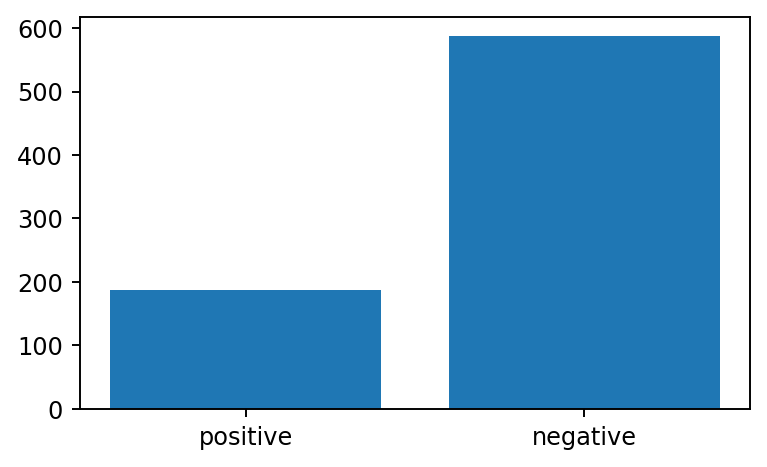

In [26]:
# plotting bar chart
labels = ['positive', 'negative']
values = [188,588]

plt.figure(figsize = (5,3), dpi = 173)

bars = plt.bar(labels,values)

# plt.savefig('mybar.png', dpi = 371)


plt.show()

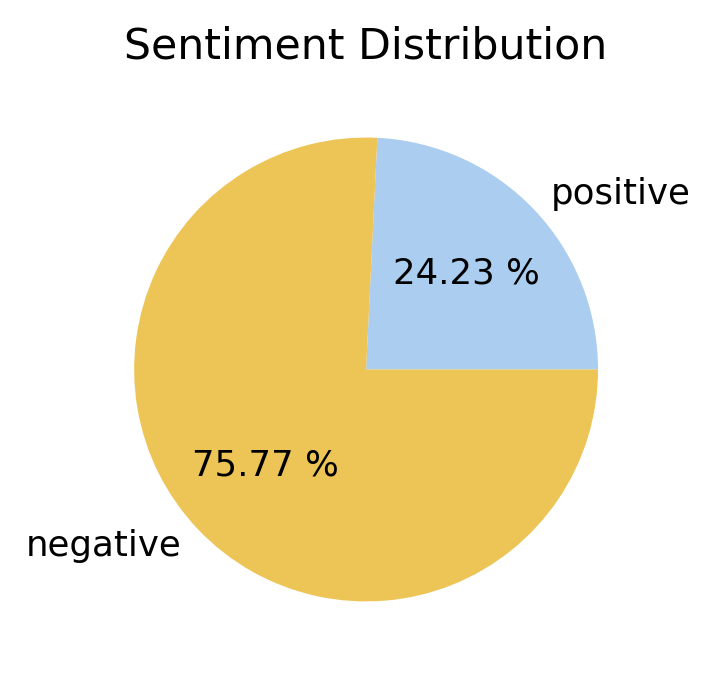

In [27]:
# plotting pie chart
plt.figure(figsize = (5,3), dpi = 256)
chart_label = ['positive', 'negative']
chart_colors = ['#abcdef','#edc456']
values = [188,588]

plt.pie(values, labels = chart_label, colors = chart_colors, autopct = '%.2f %%')

plt.title('Sentiment Distribution')

# plt.savefig('mychart.png', dpi = 371)

plt.show()